## Loading and Saving Data with Pandas

The pygmentize command-line tool can be used to display a text file in IPython or Jupyter.  It can be installed with `conda install -c conda-forge pygments` or with pip. We can take a look at the CSV with this tool:

In [1]:
!pygmentize -l text data/itunes_data.csv

Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
All the Best Cowboys Have Daddy Issues,,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
Ben Franklin,,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
O Último Romântico (Ao Vivo),,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
Freewheel Burning,,265952,8713599,0.99,Metal,Living After Midnight,Judas Priest
That's The Way,Robert Plant,343431,11248455,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin
Mellowship Slinky In B Major,Anthony Kiedis/Chad Smith/Flea/John Frusciante,240091,7971384,0.99,Alternative & Punk,Blood Sugar Sex Magik,Red Hot Chili Peppers
"Diga Lá, Coração",,255921,8280636,0.99,Latin,Meus Momentos,Gonzaguinha
Come As You Are,Kurt Cobain,219219,7123357,0.99,Rock,Neve

In [2]:
import pandas as pd

In [3]:
csv_df = pd.read_csv('data/itunes_data.csv')
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [4]:
excel_df = pd.read_excel('data/itunes_data.xlsx', engine='openpyxl')
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [5]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/chinook.db')

In [6]:
query = """SELECT tracks.name as Track, tracks.composer, tracks.milliseconds,
tracks.bytes, tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""

In [7]:
with engine.connect() as connection:
    sql_df = pd.read_sql_query(query, connection)

In [8]:
sql_df.head(2).T

,0,1
Track,For Those About To Rock (We Salute You),Put The Finger On You
Composer,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson"
Milliseconds,343719,205662
Bytes,11170334,6713451
UnitPrice,0.99,0.99
Genre,Rock,Rock
Album,For Those About To Rock We Salute You,For Those About To Rock We Salute You
Artist,AC/DC,AC/DC


In [9]:
# create dataframe from lists
df = pd.DataFrame(data={'seconds': [1, 2, 3, 4], 'intensity': [12, 11, 12, 14]})
df.head()

,seconds,intensity
0,1,12
1,2,11
2,3,12
3,4,14


## Understanding the DataFrame Structure and Combining/Concatenating Multiple DataFrames

In [10]:
sql_df.index

RangeIndex(start=0, stop=3503, step=1)

In [11]:
sql_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [12]:
type(sql_df)

pandas.core.frame.DataFrame

In [13]:
itunes_df = pd.concat([csv_df, excel_df, sql_df], axis=0)
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


## Exploratory Data Analysis (EDA) and Basic Data Cleaning with pandas

In [14]:
itunes_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [15]:
print(itunes_df.iloc[0])
print(itunes_df.iloc[-1])

Track           All the Best Cowboys Have Daddy Issues
Composer                                           NaN
Milliseconds                                   2555492
Bytes                                        211743651
UnitPrice                                         1.99
Genre                                         TV Shows
Album                                   Lost, Season 1
Artist                                            Lost
Name: 0, dtype: object
Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 350

In [16]:
itunes_df.iloc[0, 0]

'All the Best Cowboys Have Daddy Issues'

In [17]:
itunes_df.iloc[-1, -1]

'Philip Glass Ensemble'

In [18]:
itunes_df.loc[3502]

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object

In [19]:
test_df = itunes_df.copy()
test_df = test_df.append(itunes_df.loc[3502])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [20]:
test_df.reset_index(inplace=True, drop=True)
test_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [21]:
test_df.index

RangeIndex(start=0, stop=4022, step=1)

In [22]:
itunes_df.shape

(4021, 8)

In [23]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 411.8+ KB


In [24]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [25]:
type(itunes_df.isna())

pandas.core.frame.DataFrame

In [26]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [27]:
itunes_df['Genre'].mode()

0    Rock
dtype: object

In [28]:
itunes_df['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [29]:
itunes_df['Genre'].value_counts()[:5]

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: Genre, dtype: int64

In [30]:
itunes_df['Artist'].unique().shape

(204,)

In [31]:
itunes_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


## Plotting with DataFrames

In [32]:
import matplotlib.pyplot as plt

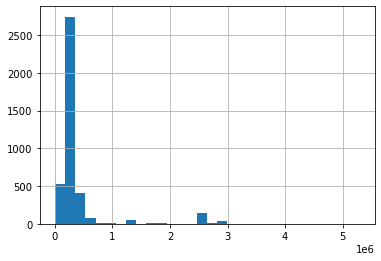

In [33]:
itunes_df['Milliseconds'].hist(bins=30)
plt.show()

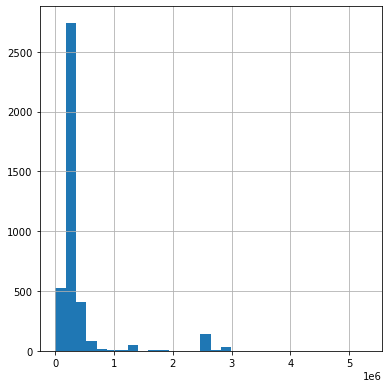

In [34]:
# this cell is for saving the image; more on this is chapter 5
f = plt.figure(figsize=(5.5, 5.5))  # this changes the size of the image -- more on this is chapter 5
f.patch.set_facecolor('w')  # sets background color behind axis labels
itunes_df['Milliseconds'].hist(bins=30)
plt.tight_layout()  # auto-adjust margins

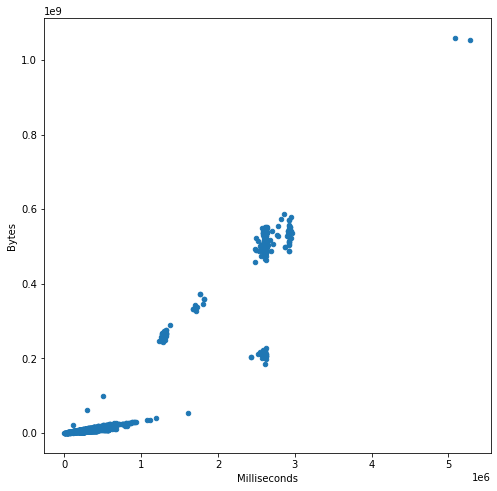

In [35]:
# figsize increases the size of the image -- more on this is chapter 5
itunes_df.plot.scatter(x='Milliseconds', y='Bytes', figsize=(8, 8))
plt.show()

<Figure size 432x288 with 0 Axes>

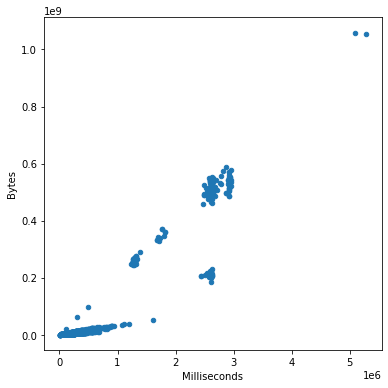

In [36]:
# saving the image -- more on this in chapter 5
f = plt.figure()
itunes_df.plot.scatter(x='Milliseconds', y='Bytes', figsize=(5.5, 5.5))
f.patch.set_facecolor('w')  # sets background color behind axis labels
plt.tight_layout()  # auto-adjust margins

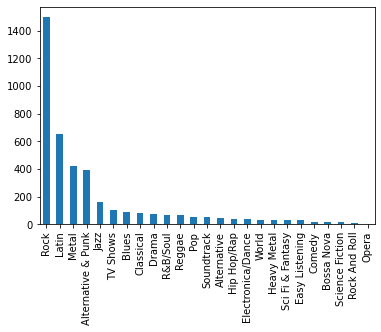

In [37]:
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

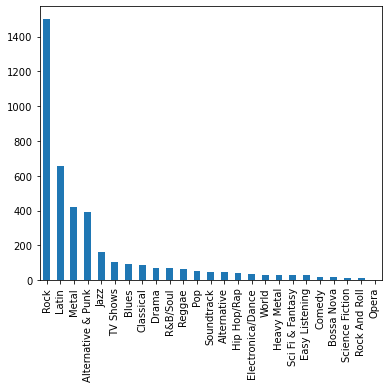

In [38]:
# saving the image -- more on this in chapter 5
f = plt.figure(figsize=(5.5, 5.5))
itunes_df['Genre'].value_counts().plot.bar()
f.patch.set_facecolor('w')  # sets background color behind axis labels
plt.tight_layout()  # auto-adjust margins

## Cleaning Data, Filtering DataFrames

In [39]:
itunes_df[itunes_df['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [40]:
print(itunes_df[itunes_df['Milliseconds'] > 4e6])

                        Track Composer  Milliseconds       Bytes  UnitPrice  \
2833   Occupation / Precipice     None       5286953  1054423946       1.99   
2898  Through a Looking Glass     None       5088838  1059546140       1.99   

         Genre                           Album                Artist  
2833  TV Shows  Battlestar Galactica, Season 3  Battlestar Galactica  
2898     Drama                  Lost, Season 3                  Lost  


In [41]:
print(itunes_df[itunes_df['Milliseconds'] > 4e6][['Genre', 'Artist']])

         Genre                Artist
2833  TV Shows  Battlestar Galactica
2898     Drama                  Lost


In [42]:
itunes_df['Milliseconds'] > 4e6

0       False
1       False
2       False
3       False
4       False
        ...  
3498    False
3499    False
3500    False
3501    False
3502    False
Name: Milliseconds, Length: 4021, dtype: bool

In [43]:
itunes_df[itunes_df['Milliseconds'] > 2e6]['Genre'].value_counts()

Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: Genre, dtype: int64

In [44]:
itunes_df[(itunes_df['Milliseconds'] > 2e6) & (itunes_df['Bytes'] < 0.4e9)]['Genre'].value_counts()

TV Shows    32
Name: Genre, dtype: int64

In [45]:
itunes_df[itunes_df['Genre'] != 'TV Shows']['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Sci Fi & Fantasy        31
Heavy Metal             31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [46]:
itunes_df[~(itunes_df['Genre'] == 'TV Shows')]['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Sci Fi & Fantasy        31
Heavy Metal             31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [47]:
itunes_df[itunes_df['Genre'].str.contains('TV')]['Genre'].value_counts()

TV Shows    105
Name: Genre, dtype: int64

In [48]:
itunes_df_copy = itunes_df.copy()  # make a backup to test dropping a column
itunes_df_copy.drop('Composer', axis=1, inplace=True)
itunes_df_copy.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist'],
      dtype='object')

In [49]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]

### Missing values

In [50]:
itunes_df[itunes_df['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2947,Three Minutes,None,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
98,Romance Ideal,NaN,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3327,Todo o Carnaval tem seu Fim,None,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2457,We've Got To Get Together/Jingo,None,1070027,34618222,0.99,Rock,Santana Live,Santana
587,Vamos Dançar,None,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


In [51]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
# print shapes to check that rows were dropped
print(itunes_df_copy.shape)
itunes_df_copy.dropna(inplace=True)
print(itunes_df_copy.shape)

(4021, 8)
(2908, 8)


In [52]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
itunes_df_copy.loc[itunes_df['Composer'].isna(), 'Composer'] = 'Unknown'
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,Unknown,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,Unknown,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),Unknown,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [53]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
itunes_df_copy['Composer'].fillna('Unknown', inplace=True)
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,Unknown,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,Unknown,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),Unknown,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [54]:
itunes_df['UnitPrice'].value_counts().iloc[0]/itunes_df.shape[0]

0.9398159661775678

In [55]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
itunes_df_copy['UnitPrice'].fillna(itunes_df_copy['UnitPrice'].mode(), inplace=True)
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


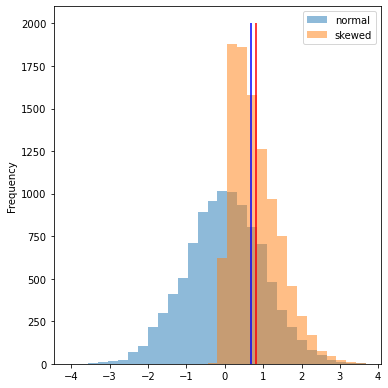

In [56]:
# create distributions for plotting
from scipy.stats import skewnorm
df = pd.DataFrame({'normal': skewnorm.rvs(0, size=10000), 'skewed': skewnorm.rvs(10, size=10000)})

df.plot.hist(bins=30, alpha=0.5, figsize=(5.5, 5.5))
plt.vlines(df['skewed'].mean(), ymin=0, ymax=2000, label='mean', color='r')
plt.vlines(df['skewed'].median(), ymin=0, ymax=2000, label='median', color='b')
f.patch.set_facecolor('w')  # sets background color behind axis labels
plt.tight_layout()  # auto-adjust margins

#### KNN imputation

In [57]:
import numpy as np
itunes_df_copy = itunes_df.copy()  # create copy of the dataframe so we don't alter the original
itunes_df_copy.loc[0, 'Bytes'] = np.nan

In [58]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(itunes_df_copy[['Milliseconds', 'Bytes', 'UnitPrice']])

In [59]:
# there are multiple values with the index value of 0, which is why we get multiple results
itunes_df.loc[0, 'Bytes']

0    211743651
0      6022698
0     11170334
Name: Bytes, dtype: int64

In [60]:
itunes_df_copy['Bytes'] = imputed[:, 1]

In [61]:
itunes_df_copy.loc[0, 'Bytes']

0    381737603.6
0      5454572.2
0     11232851.2
Name: Bytes, dtype: float64

In [62]:
itunes_df['Bytes'].mean()

33110484.730912708

In [63]:
# adapted from this SO answer: https://stackoverflow.com/a/46740476/4549682
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df

In [64]:
itunes_df_clean = remove_outliers(itunes_df, 'Milliseconds')

In [65]:
itunes_df_clean.shape

(3614, 8)

In [66]:
itunes_df.shape

(4021, 8)

### Duplicate values

In [67]:
itunes_df.duplicated().sum()

518

In [68]:
itunes_df.drop_duplicates(inplace=True)

## Data Transformations

In [69]:
itunes_df['Seconds'] = itunes_df['Milliseconds'] / 1000

In [70]:
itunes_df['len_byte_ratio'] = itunes_df['Milliseconds'] / itunes_df['Bytes']

### Apply and Map

In [71]:
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
itunes_df['Genre'].replace(genre_dict)

0         TV Shows
1            Latin
2            Latin
3           Comedy
4            Latin
           ...    
3496     Classical
3499     Classical
3500     Classical
3501     Classical
3502    Soundtrack
Name: Genre, Length: 3503, dtype: object

In [72]:
itunes_df['Genre'].apply(lambda x: x.lower())

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

In [73]:
# the above is the same as this
def lowercase(x):
    return x.lower()

itunes_df['Genre'].apply(lowercase)

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

In [74]:
# but using built-in functions is almost always faster
itunes_df['Genre'].str.lower()

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

Here would be an exception to the rule for using apply -- we want to get a hybrid score of the polarity and subjectivty of text:

In [75]:
# this is a common sentiment analysis library; polarity is positive/negative sentiment,
# subjectivety is subjective/objective rating.
from textblob import TextBlob
test = TextBlob("Textblob is amazingly simple to use. What great fun!")
test.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [76]:
test.sentiment.polarity

0.39166666666666666

In [77]:
# it would be better than apply to use a list comprehension to get sentiment of track names, like this
itunes_df['Track_sentiment'] = [TextBlob(x).sentiment.polarity for x in itunes_df['Track']]

In [78]:
# but, if we wanted to mix polarity and subjectivity into one column, it would be best to use apply:
def pol_sub_mix(x):
    tb = TextBlob(x)
    return tb.polarity * tb.subjectivity

itunes_df['Track_pol_sub_mix'] = itunes_df['Track'].apply(pol_sub_mix)

In [79]:
# delete these columns
itunes_df.drop(['Track_pol_sub_mix', 'Track_sentiment'], inplace=True, axis=1)

In [80]:
# currently doesn't work with python 3.9
# import swifter
# itunes_df['Genre'].swifter.apply(lambda x: x.lower())

### Group By

In [81]:
itunes_df.groupby('Genre').mean()['Seconds'].sort_values().head()

Genre
Rock And Roll     134.643500
Opera             174.813000
Hip Hop/Rap       178.176286
Easy Listening    189.164208
Bossa Nova        219.590000
Name: Seconds, dtype: float64

### Saving data

In [82]:
itunes_df.to_csv('data/cleaned_itunes_data.csv', index=False)

# Bitcoin data analysis

In [83]:
btc_df = pd.read_csv('data/bitcoin_price.csv')
btc_df.head()

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305


In [84]:
btc_df['symbol'].unique()

array(['btcusd'], dtype=object)

In [85]:
btc_df.drop('symbol', axis=1, inplace=True)

In [86]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='ms')

In [87]:
btc_df['time'].dtype

dtype('<M8[ns]')

In [88]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2793 non-null   datetime64[ns]
 1   open    2793 non-null   float64       
 2   close   2793 non-null   float64       
 3   high    2793 non-null   float64       
 4   low     2793 non-null   float64       
 5   volume  2793 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 131.0 KB


In [89]:
btc_df.set_index('time', inplace=True)

In [90]:
btc_df.head()

,open,close,high,low,volume
time,,,,,
2013-03-31,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,134.716560,132.899000,143.00000,119.00000,6981.668305


<AxesSubplot:xlabel='time'>

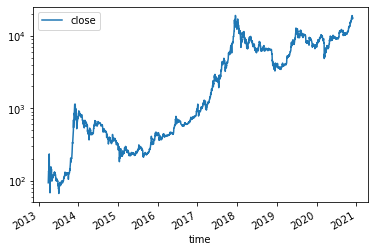

In [91]:
btc_df[['close']].plot(logy=True)

<Figure size 396x396 with 0 Axes>

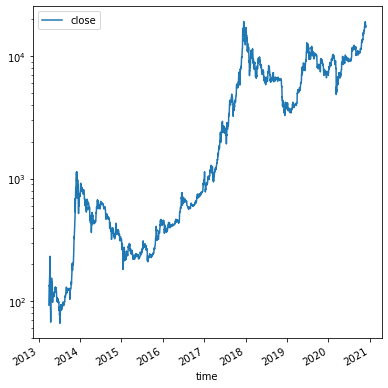

In [92]:
f = plt.figure(figsize=(5.5, 5.5))
btc_df.iloc[-3000:][['close']].plot(logy=True, figsize=(5.5, 5.5))
f.patch.set_facecolor('w')  # sets background color behind axis labels
plt.tight_layout()  # auto-adjust margins

We could load a datetime as a pandas timestamp like so. Unfortunately, this trick doesn't work with seconds since the epoch, but does work with other datetime formats. For seconds since the epoch, we can provide a conversion function to the argument `date_parser` in `read_csv`, or convert it with `to_datetime` after loading.

In [93]:
btc_df2 = pd.read_csv('data/bitcoin_price.csv', index_col='time', parse_dates=['time'], infer_datetime_format=True)
btc_df2.head()

,symbol,open,close,high,low,volume
time,,,,,,
1364688000000,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
1364774400000,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
1364860800000,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
1364947200000,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
1365033600000,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305


In [94]:
date_parser = lambda x: pd.to_datetime(x, unit='ms')
btc_df2 = pd.read_csv('data/bitcoin_price.csv', index_col='time', parse_dates=['time'], date_parser=date_parser)
btc_df2.head()

,symbol,open,close,high,low,volume
time,,,,,,
2013-03-31,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305


In [95]:
btc_df.loc['1-1-2019':'12-31-2019']

,open,close,high,low,volume
time,,,,,
2019-01-01,3832.628624,3963.1,3987.000000,3788.100000,13848.346752
2019-01-02,3963.000000,4048.8,4083.470676,3917.900000,19437.727989
2019-01-03,4049.000000,3924.3,4056.644331,3875.100000,10748.083712
2019-01-04,3923.200000,3954.9,3986.000000,3850.100000,13228.660465
2019-01-05,3954.900000,3911.9,4014.900000,3901.000000,14873.962225
...,...,...,...,...,...
2019-12-27,7231.600000,7287.0,7300.000000,7113.300000,3996.647227
2019-12-28,7287.000000,7334.4,7390.000000,7279.200000,2731.060711
2019-12-29,7334.400000,7413.6,7551.600000,7311.600000,2494.487206


In [96]:
btc_df.loc['2019']

,open,close,high,low,volume
time,,,,,
2019-01-01,3832.628624,3963.1,3987.000000,3788.100000,13848.346752
2019-01-02,3963.000000,4048.8,4083.470676,3917.900000,19437.727989
2019-01-03,4049.000000,3924.3,4056.644331,3875.100000,10748.083712
2019-01-04,3923.200000,3954.9,3986.000000,3850.100000,13228.660465
2019-01-05,3954.900000,3911.9,4014.900000,3901.000000,14873.962225
...,...,...,...,...,...
2019-12-27,7231.600000,7287.0,7300.000000,7113.300000,3996.647227
2019-12-28,7287.000000,7334.4,7390.000000,7279.200000,2731.060711
2019-12-29,7334.400000,7413.6,7551.600000,7311.600000,2494.487206


# NumPy

In [97]:
close_array = btc_df['close'].values

In [98]:
close_array

array([   93.033     ,   103.999     ,   118.22935407, ...,
       17211.69580098, 17171.        , 17686.840768  ])

In [99]:
close_array.shape

(2793,)

In [100]:
close_array.dtype

dtype('float64')

In [101]:
import numpy as np

close_list = btc_df['close'].to_list()
close_array = np.array(close_list)
close_array

array([   93.033     ,   103.999     ,   118.22935407, ...,
       17211.69580098, 17171.        , 17686.840768  ])

In [102]:
%timeit kd_close = close_array / 1000

2.65 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [103]:
%timeit kd_close_list = [c / 1000 for c in close_list]

149 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [104]:
volume_array = btc_df['volume'].values
close_array * volume_array

array([2.86828162e+05, 5.43332512e+05, 9.90351433e+05, ...,
       5.91110933e+08, 1.92622769e+08, 6.25398332e+07])

In [105]:
btc_df['market_cap'] = btc_df['close'] * btc_df['volume']
btc_df['market_cap']

time
2013-03-31    2.868282e+05
2013-04-01    5.433325e+05
2013-04-02    9.903514e+05
2013-04-03    1.750594e+06
2013-04-04    9.278567e+05
                  ...     
2020-11-24    2.857665e+08
2020-11-25    2.523951e+08
2020-11-26    5.911109e+08
2020-11-27    1.926228e+08
2020-11-28    6.253983e+07
Name: market_cap, Length: 2793, dtype: float64

In [106]:
np.log(btc_df['close'])

time
2013-03-31    4.532954
2013-04-01    4.644381
2013-04-02    4.772626
2013-04-03    4.903050
2013-04-04    4.889589
                ...   
2020-11-24    9.859065
2020-11-25    9.837722
2020-11-26    9.753344
2020-11-27    9.750977
2020-11-28    9.780576
Name: close, Length: 2793, dtype: float64